##  Вторая версия домашки, чуть более праильная и красивая 

### TfidfVectorizer

In [133]:
 import pandas as pd

In [134]:
answers_data = pd.read_excel("answers_base.xlsx")
queries_data = pd.read_excel("queries_base.xlsx")

In [135]:
answers_data.head()

,Номер связки,Текст вопросов,Текст ответа,Тематика
0,57,У ребенка в школе продлили каникулы. Могу ли я...,Листок временной нетрудоспособности (больничны...,БОЛЬНИЧНЫЙ ЛИСТ
1,78,Где сделать вакцинацию от коронавируса?\nСущес...,"Коронавирусы - это целое семейство вирусов, ко...",ВАКЦИНАЦИЯ
2,326,Сколько стоит сделать вакцину от гриппа?\nМожн...,Бесплатно пройти вакцинацию можно в Вашей меди...,ВАКЦИНАЦИЯ
3,327,Могу я отказаться от вакцинации?\nВ каких случ...,Согласно приказу Министерства здравоохранения ...,ВАКЦИНАЦИЯ
4,328,Безопасна ли вакцинация?\nОпасна ли вакцинация...,В соответствии с пунктами 1 и 2 статьи 12 Феде...,ВАКЦИНАЦИЯ


In [136]:
queries_data = queries_data.drop(columns=["Unnamed: 3", "Unnamed: 4"])
queries_data.head()

,Текст вопроса,Номер связки,Тематика
0,с уважением Вероника Игоревна Ильич\n\nПосле ...,308.0,"ЗАКРЫТИЕ ГРАНИЦ, ОТКРЫТИЕ ГРАНИЦ РОССИИ И АВИА..."
1,"Здравствуйте! Проинформируйте, пожалуйста, нуж...",324.0,ОРГАНИЗАЦИИ ОТДЫХА ДЕТЕЙ И ИХ ЗДОРОВЛЕНИЯ
2,"--\nДобрый день!\n Меня, Сидельникова Андрея...",57.0,БОЛЬНИЧНЫЙ ЛИСТ
3,Добрый день.\nВ Кемеровской области согласно п...,45.0,"ШТРАФЫ, НОРМАТИВНЫЕ АКТЫ И РЕКОМЕНДАЦИИ"
4,"Здравствуйте, в моем городе Кострома введено о...",3.0,"ШТРАФЫ, НОРМАТИВНЫЕ АКТЫ И РЕКОМЕНДАЦИИ"


In [137]:
import re
from razdel import tokenize
from nltk.corpus import stopwords
stops = stopwords.words("russian")

from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

from tqdm.auto import tqdm
tqdm.pandas()

In [138]:
stops.extend(['здравствуйте', 'добрый', 'день'])
print(stops)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [139]:
def tokenizer(text_data):
    tokens = [_.text for _ in list(tokenize(str(text_data).lower())) if not re.search('[^а-яА-ЯёЁa-zA-z]', _.text)]
    return " ".join(tokens)

def lemmatizer(tokens):
    lem_text = []
    for word in tokens.split(" "):
        lem = morph.parse(word)[0].normal_form
        if lem not in stops:
            lem_text.append(lem)
    return ' '.join(lem_text)

In [140]:
test_string = queries_data["Текст вопроса"][3]
print(test_string, "\n=====\n")

test_tokens = tokenizer(test)
print(test_tokens, "\n=====\n")

test_lem = lemmatizer(test_tokens)
print(test_lem, "\n=====\n")

Добрый день.
В Кемеровской области согласно постановлению Администрации необходимо организовать изолятор для временного содержания больного сотрудника до передачи его в скорую. Планируем организовать изолятор в помещении раздевалки, отгородив часть помещения пленкой от пола до потолка. Разрешается ли такое, так как место ограничено и свободных помещений нет. 

Отправлено с iPhone
 
=====

добрый день в кемеровской области согласно постановлению администрации необходимо организовать изолятор для временного содержания больного сотрудника до передачи его в скорую планируем организовать изолятор в помещении раздевалки отгородив часть помещения пленкой от пола до потолка разрешается ли такое так как место ограничено и свободных помещений нет отправлено с iphone 
=====

кемеровский область согласно постановление администрация необходимый организовать изолятор временной содержание больной сотрудник передача скорый планировать организовать изолятор помещение раздевалка отгородить часть помещен

In [141]:
queries_data["tokens"] = queries_data["Текст вопроса"].progress_apply(tokenizer)
queries_data["lemm"] = queries_data["tokens"].progress_apply(lemmatizer)
queries_data.head()

,Текст вопроса,Номер связки,Тематика,tokens,lemm
0,с уважением Вероника Игоревна Ильич\n\nПосле ...,308.0,"ЗАКРЫТИЕ ГРАНИЦ, ОТКРЫТИЕ ГРАНИЦ РОССИИ И АВИА...",с уважением вероника игоревна ильич после авгу...,уважение вероника игорь илья август год москва...
1,"Здравствуйте! Проинформируйте, пожалуйста, нуж...",324.0,ОРГАНИЗАЦИИ ОТДЫХА ДЕТЕЙ И ИХ ЗДОРОВЛЕНИЯ,здравствуйте проинформируйте пожалуйста нужен ...,здравствовать проинформировать пожалуйста нужн...
2,"--\nДобрый день!\n Меня, Сидельникова Андрея...",57.0,БОЛЬНИЧНЫЙ ЛИСТ,добрый день меня сидельникова андрея олеговича...,сидельников андрей олег год р посадить каранти...
3,Добрый день.\nВ Кемеровской области согласно п...,45.0,"ШТРАФЫ, НОРМАТИВНЫЕ АКТЫ И РЕКОМЕНДАЦИИ",добрый день в кемеровской области согласно пос...,кемеровский область согласно постановление адм...
4,"Здравствуйте, в моем городе Кострома введено о...",3.0,"ШТРАФЫ, НОРМАТИВНЫЕ АКТЫ И РЕКОМЕНДАЦИИ",здравствуйте в моем городе кострома введено ог...,здравствовать мыть город кострома ввести огран...


In [13]:
# answers_data["tokens"] = answers_data["Текст ответа"].progress_apply(tokenizer)
# answers_data["lemm"] = answers_data["tokens"].progress_apply(lemmatizer)
# answers_data.head()

In [142]:
train = queries_data[["lemm", "Номер связки\n"]][:int(len(queries_data)*0.7)]
train = train.rename(columns = {"lemm": "question", "Номер связки\n": "index"}, inplace = False)
train.tail(10)

,question,index
1599,здравствовать просить объяснить требоваться ро...,308.0
1600,просьба дать пояснение срок предоставление рез...,308.0
1601,получить копия результат анализ предмет подтве...,6.0
1602,здравствовать возвращение заграницы течение х ...,308.0
1603,сообщить пожалуйста вправе открыть листок нетр...,57.0
1604,здравствовать звать александр архипов граждани...,308.0
1605,результат пцр мазка мещанинов константин валентин,6.0
1606,являться сотрудник министерство гражданский об...,1.0
1607,здравствовать нужно уточнить вопрос касаться в...,308.0
1608,здравствовать нужно уточнить вопрос касаться в...,308.0


In [143]:
test = queries_data[["lemm", "Номер связки\n"]][int(len(queries_data)*0.7):]
test = test.rename(columns = {"lemm": "question", "Номер связки\n": "index"}, inplace = False)
test.head(10)

,question,index
1609,интересовать конкретно переход граница абхазия,308.0
1610,прибыть турция территория рф согласно постанов...,308.0
1611,интересовать вопрос гость приехать родитель гр...,308.0
1612,член семья подтвердить ковид вчера это узнать ...,1.0
1613,найти ответ свой вопрос срок прикрепление резу...,308.0
1614,турист прилёт рф турция успеть уложиться дневн...,308.0
1615,никакой образ помочь нужно обратиться прокурат...,1.0
1616,звать анастасий август семья получить рука уве...,308.0
1617,здравствовать звать елизавета николай поздняк ...,257.0
1618,пересекать граница машина весь равно нужно сда...,308.0


In [144]:
question_index = {}
for question_chunk, answer_n in answers_data[["Текст вопросов", "Номер связки"]].values:
    questions = question_chunk.split('\n')
    for q in questions:
        lem_q = lemmatizer(tokenizer(q))
        if lem_q != "":
            question_index[lem_q] = answer_n
            
question_df = pd.DataFrame({"question": q, "index": i} for q,i in question_index.items())
question_df.tail()

,index,question
750,45,ознакомиться нормативный методический документ...
751,21,правительство явно скрывать ситуация коронавирус
752,21,узнать реальный количество заболеть
753,21,эпидемиологический ситуация мир россия мыть ре...
754,21,страна неблагополучный эпидситуация


In [145]:
train = train.append(question_df, sort=False, ignore_index = True)
train.tail()

,question,index
2359,ознакомиться нормативный методический документ...,45.0
2360,правительство явно скрывать ситуация коронавирус,21.0
2361,узнать реальный количество заболеть,21.0
2362,эпидемиологический ситуация мир россия мыть ре...,21.0
2363,страна неблагополучный эпидситуация,21.0


In [146]:
corpora = train["question"]

## Функция ранжирования bm25

In [75]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from math import log

Для обратного индекса есть общепринятая формула для ранжирования *Okapi best match 25* ([Okapi BM25](https://ru.wikipedia.org/wiki/Okapi_BM25)).    
Пусть дан запрос $Q$, содержащий слова  $q_1, ... , q_n$, тогда функция BM25 даёт следующую оценку релевантности документа $D$ запросу $Q$:

$$ score(D, Q) = \sum_{i}^{n} \text{IDF}(q_i)*\frac{TF(q_i,D)*(k+1)}{TF(q_i,D)+k(1-b+b\frac{l(d)}{avgdl})} $$ 
где   
>$TF(q_i,D)$ - частота слова $q_i$ в документе $D$      
$l(d)$ - длина документа (количество слов в нём)   
*avgdl* — средняя длина документа в коллекции    
$k$ и $b$ — свободные коэффициенты, обычно их выбирают как $k$=2.0 и $b$=0.75   
$$$$
$\text{IDF}(q_i)$ - это модернизированная версия IDF: 
$$\text{IDF}(q_i) = \log\frac{N-n(q_i)+0.5}{n(q_i)+0.5},$$
>> где $N$ - общее количество документов в коллекции   
$n(q_i)$ — количество документов, содержащих $q_i$

In [147]:
def get_bm25_components(corpora):
    count_vectorizer = CountVectorizer(analyzer=str.split)
    count_matrix = count_vectorizer.fit_transform(corpora)
    print(count_matrix.shape)

    k = 2.0
    b = 0.75

    length = count_matrix.sum(axis=1)
    avgdl = length.mean()
    tf_matrix = (count_matrix * (k+1)) / (count_matrix + k * (1 - b + b * (length/avgdl) ))
    print(tf_matrix.shape)

    n = (tf_matrix != 0).sum(axis=0)
    N = count_matrix.shape[0]
    def idf(i):
        res = log( (N - n[0, i] + 0.5) / (n[0, i] + 0.5) )
        return res

    idf_vector = np.array([idf(i) for i in range(count_matrix.shape[1])])
    print(idf_vector.shape)
    
    return count_vectorizer, tf_matrix, idf_vector

### __Задача 1__:    
Реализуйте поиск с метрикой *TF-IDF* через умножение матрицы на вектор.
Что должно быть в реализации:
- проиндексированная база, где каждый документ представлен в виде вектора TF-IDF
- функция перевода входяшего запроса в вектор по метрике TF-IDF
- ранжирование докуменов по близости к запросу по убыванию

В качестве корпуса возьмите корпус вопросов в РПН по Covid2019. Он состоит из:
> файл **answers_base.xlsx** - база ответов, у каждого ответа есть его номер, тематика и примеры вопросов, которые могут быть заданы к этому ответу. Сейчас проиндексировать надо именно примеры вопросов в качестве документов базы. Понимаете почему?

> файл **queries_base.xlsx** - вопросы юзеров, к каждому из которых проставлен номер верного ответа из базы. Разделите эти вопросы в пропорции 70/30 на обучающую (проиндексированную как база) и тестовую (как запросы) выборки. 


In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [153]:
vectorizer = TfidfVectorizer(analyzer=str.split)
X = vectorizer.fit_transform(corpora)
X.shape

(2364, 5849)

In [154]:
def tfidf_search(querry_lem):
    q_vec = vectorizer.transform([querry_lem]).toarray()
    res = np.dot(X.toarray(), q_vec.T)
    index = np.argmax(res)
    return train["index"][index]

In [155]:
test_id = 1
test_q = queries_data["Текст вопроса"][test_id]
test_lem = queries_data["lemm"][test_id]
print(test_q)
index = tfidf_search(test_lem)
print(index, queries_data["Номер связки\n"][test_id])

Здравствуйте! Проинформируйте, пожалуйста, нужен ли тест на COVID-19 при заселении в санаторий в августе 2020 года?

324.0 324.0


In [156]:
test["pred_tfidf"] = test["question"].progress_apply(tfidf_search)

In [157]:
(test["pred_tfidf"] == test['index']).sum() / len(test)

0.4927536231884058

### __Задача 2__:    
Аналогичная задаче1 с другой метрикой 

Реализуйте поиск с метрикой *BM25* через умножение матрицы на вектор. Что должно быть в реализации:

- проиндексированная база, где каждый документ представлен в виде вектора BM25
- функция перевода входяшего запроса в вектор по метрике BM25
- ранжирование докуменов по близости к запросу по убыванию

In [148]:
count_vectorizer, tf_matrix, idf_vector = get_bm25_components(corpora)

(2364, 5849)
(2364, 5849)
(5849,)


In [149]:
def bm25_search(q):
    q_vec = count_vectorizer.transform([q]).toarray()
    mask = q_vec * idf_vector
    res = np.dot(tf_matrix, mask.T)
    index = np.argmax(res)
    return train["index"][index]

In [150]:
test["pred_bm25"] = test["question"].progress_apply(bm25_search)

In [151]:
(test['pred_bm25'] == test['index']).sum() / len(test)

0.527536231884058

## Посмотрим на результаты

Типа хитмеп распредеделения кол-ва неомеров ответов

In [179]:
heat = test[['index', 'pred_tfidf', 'pred_bm25']].apply(pd.Series.value_counts).fillna(0)
heat.style.background_gradient(cmap='Blues')

,index,pred_tfidf,pred_bm25
1.0,72,44,57
3.0,10,4,2
5.0,9,8,12
6.0,78,111,77
10.0,4,12,8
12.0,32,29,45
21.0,1,0,0
32.0,1,2,2
37.0,37,40,42
38.0,6,2,2


In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [197]:
tf_true = test[test['pred_tfidf'] == test['index']][['pred_tfidf']].apply(pd.Series.value_counts).rename(columns={'pred_tfidf': 'tf_true'})
tf_false = test[test['pred_tfidf'] != test['index']][['pred_tfidf']].apply(pd.Series.value_counts).rename(columns={'pred_tfidf': 'tf_false'})
bm_true = test[test['pred_bm25'] == test['index']][['pred_bm25']].apply(pd.Series.value_counts).rename(columns={'pred_bm25': 'bm_true'})
bm_false = test[test['pred_bm25'] != test['index']][['pred_bm25']].apply(pd.Series.value_counts).rename(columns={'pred_bm25': 'bm_false'})

In [198]:
result = pd.concat([tf_true, tf_false, bm_true, bm_false], axis=1, sort=False).fillna(0)

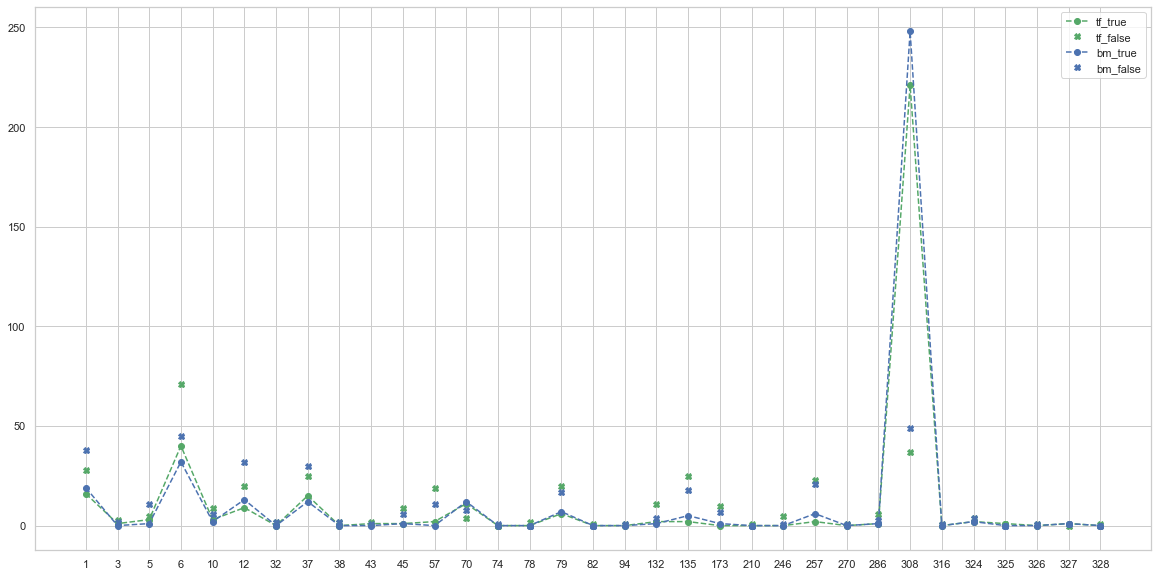

In [231]:
t = [str(int(i)) for i in result.index]
plt.figure(figsize=(20,10))
plt.plot(t, result['tf_true'], color='g', marker='o', linestyle='dashed')
plt.plot(t, result['tf_false'], color='g', marker='X', linestyle='none')
plt.plot(t, result['bm_true'], color='b', marker='o', linestyle='dashed')
plt.plot(t, result['bm_false'], color='b', marker='X', linestyle='none')
#plt.ylim(top=100)
plt.legend(labels=['tf_true', 'tf_false', 'bm_true', 'bm_false'])
plt.show()

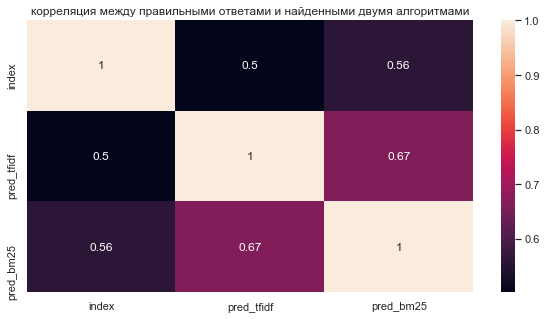

In [160]:
corr_df = test[["index", "pred_tfidf", "pred_bm25"]].corr()

fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(
    data=corr_df, 
    annot=True,
    ax=ax
)
plt.title("корреляция между правильными ответами и найденными двумя алгоритмами")
plt.show()

_Анна Полянская, БКЛ171_